# Product and Customer Analytics

### Group S2 - 2
- Alfred George (W0783363)
- Deepa Taneja Chawla (W0774178)
- NikulKumar Devataja (W0781660)
- Prathap David Carlo (W0787017)
- Rajesh Gandham (W0783532)

In [1]:
# Import  the appropriate libraries
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import seaborn as sns
import numpy as np
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
#!pip install openpyxl

In [3]:
# import the dataset from UCI machine learning laboratory site. It is an excel file
df = pd.read_excel('Online Retail.xlsx', sheet_name='Online Retail')

In [4]:
# Check the shape
df.shape

(541909, 8)

In [5]:
# Use the head function
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
#df.columns()
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# Distribution of the Quantity Column

<AxesSubplot:>

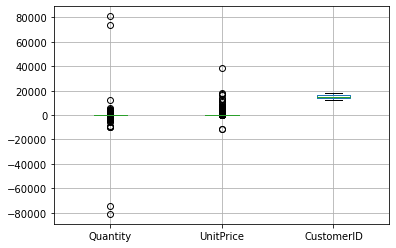

In [8]:
# Create a box plot to identify outliers
df.boxplot()

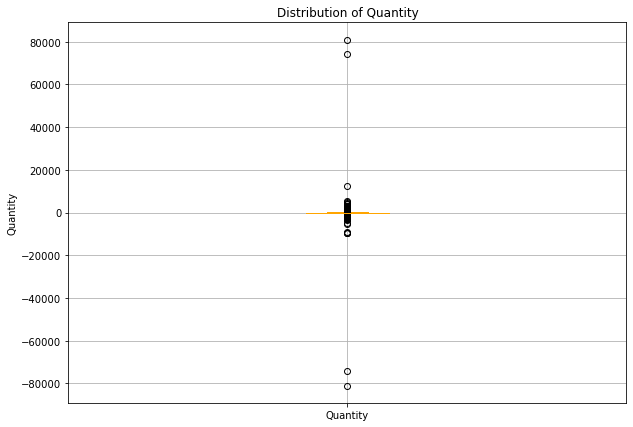

In [9]:
quantity = df['Quantity'].plot.box(grid=True,figsize=(10, 7), color='orange')
quantity.set_ylabel('Quantity')
quantity.set_title('Distribution of Quantity')

plt.show()

**Note:** The box plot demonstrates presence of outliers on the positive side as negative values. We should remove negative values for quantity.

In [10]:
# Filter out the negative quantity orders
df2=df[df["Quantity"] > 0]

In [11]:
# Check the shape again
df2.shape

(531285, 8)

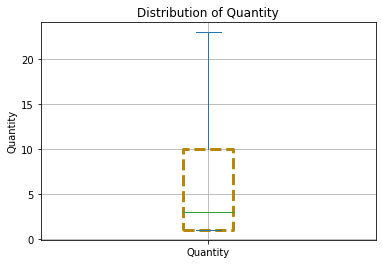

In [12]:
# Create a Box plot without negative quantity
boxprops = dict(linestyle='--', linewidth=3, color='darkgoldenrod')
quantity=df2["Quantity"].plot.box(boxprops=boxprops,grid='True',showfliers=False)
quantity.set_ylabel('Quantity')
quantity.set_title('Distribution of Quantity')

plt.show()

In [13]:
# Create a Box plot without negative quantity
df2["Quantity"].describe()

count    531285.000000
mean         10.655262
std         156.830323
min           1.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

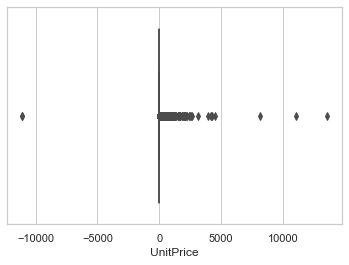

In [14]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df2["UnitPrice"])

In [15]:
# Filter out the negative quantity orders
df2=df2[df2["UnitPrice"] > 0]
df2.shape

(530104, 8)

<AxesSubplot:>

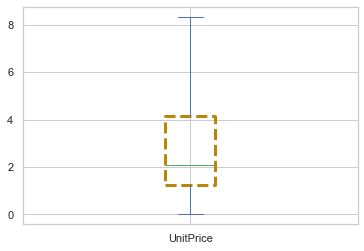

In [16]:
boxprops = dict(linestyle='--', linewidth=3, color='darkgoldenrod')
df2["UnitPrice"].plot.box(boxprops=boxprops,grid='True',showfliers=False)

In [17]:
df2["UnitPrice"].describe()

count    530104.000000
mean          3.907625
std          35.915681
min           0.001000
25%           1.250000
50%           2.080000
75%           4.130000
max       13541.330000
Name: UnitPrice, dtype: float64

# Time Series Trends
- Number of orders
- Revenue

In [18]:
# resample function resamples the data and converts the data into the desired 
# Summarize the data on a monthly basis 
m_orders_df = df2.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique()

In [19]:
m_orders_df

InvoiceDate
2010-12-31    1559
2011-01-31    1086
2011-02-28    1100
2011-03-31    1454
2011-04-30    1246
2011-05-31    1681
2011-06-30    1533
2011-07-31    1475
2011-08-31    1361
2011-09-30    1837
2011-10-31    2040
2011-11-30    2769
2011-12-31     819
Freq: M, Name: InvoiceNo, dtype: int64

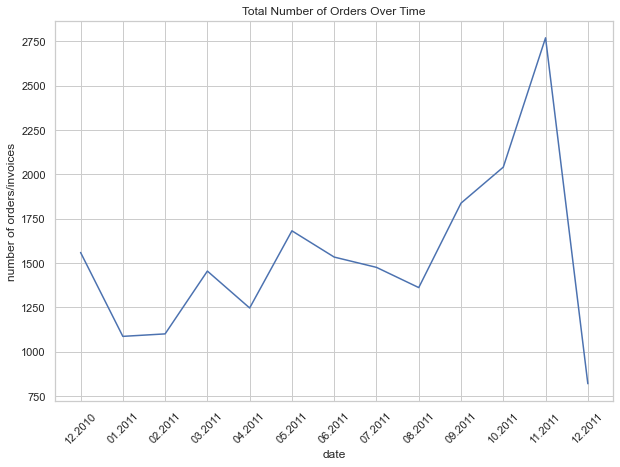

In [20]:
# Create the line chart again
# Create a Line Chart for the data 
ax = pd.DataFrame(m_orders_df.values).plot(
    grid=True,
    figsize=(10,7),
    legend=False
)

ax.set_xlabel('date')
ax.set_ylabel('number of orders/invoices')
ax.set_title('Total Number of Orders Over Time')

# use x.strftime('%m.%Y'), where x is the Pythondate object, %m is the placeholder for
# the month value, and %Y is the placeholder for the year value. The strftime function
# of the Pythondate object formats the date into the given format.

plt.xticks(
    range(len(m_orders_df.index)), 
    [x.strftime('%m.%Y') for x in m_orders_df.index], 
    rotation=45
)

plt.show()

In [21]:
# Get all invoice dates from December 1, 2011 
invoice_dates = df2.loc[
    df2['InvoiceDate'] >= '2011-12-01',
    'InvoiceDate'
]

In [22]:
# Print Min and Max dates in that series
print('Min date: %s\nMax date: %s' % (invoice_dates.min(), invoice_dates.max()))

Min date: 2011-12-01 08:33:00
Max date: 2011-12-09 12:50:00


#### Q1. What do you observe?
#### Answer 1

In November, sales were at an all-time high, but suddenly dropped to their lowest point in december, in further investigating we found the max order date for the month of december is 9th, that is we have a very small section of the data available for december month, i.e., 9 days. If we consider this data it would be a misrepresentation of the december sales due to unavailability of data from other days of the month, it is because we don't have enough data for the whole month of december. We only have sales for nine days hence exclude we should exclude December data for our analysis.

In [23]:
# Remove the December 2011 data
df3=df2[df2["InvoiceDate"] < '2011-12-01']


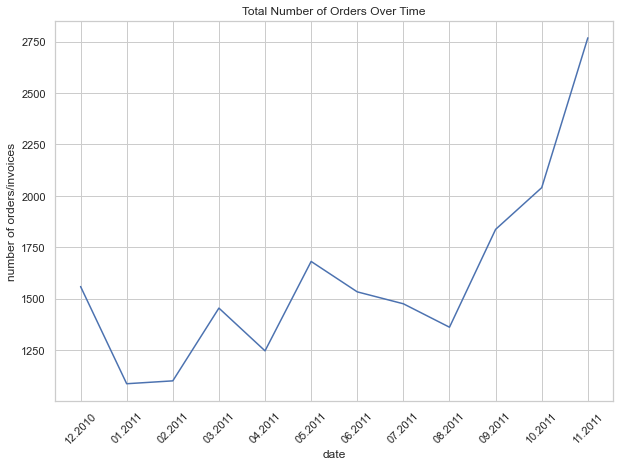

In [24]:
# Recalculate the monthly distribution
# resample function resamples the data and converts the data into the desired 
# Summarize the data on a monthly basis 
m_orders_df1 = df3.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique()

# Create the line chart again
# Create a Line Chart for the data 
ax = pd.DataFrame(m_orders_df1.values).plot(
    grid=True,
    figsize=(10,7),
    legend=False
)

ax.set_xlabel('date')
ax.set_ylabel('number of orders/invoices')
ax.set_title('Total Number of Orders Over Time')

# use x.strftime('%m.%Y'), where x is the Pythondate object, %m is the placeholder for
# the month value, and %Y is the placeholder for the year value. The strftime function
# of the Pythondate object formats the date into the given format.

plt.xticks(
    range(len(m_orders_df1.index)), 
    [x.strftime('%m.%Y') for x in m_orders_df1.index], 
    rotation=45
)

plt.show()

In [25]:
df3

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
516364,579885,85034C,3 ROSE MORRIS BOXED CANDLES,4,2011-11-30 17:37:00,1.25,15444.0,United Kingdom
516365,579885,21742,LARGE ROUND WICKER PLATTER,2,2011-11-30 17:37:00,5.95,15444.0,United Kingdom
516366,579885,23084,RABBIT NIGHT LIGHT,6,2011-11-30 17:37:00,2.08,15444.0,United Kingdom
516367,579885,21257,VICTORIAN SEWING BOX MEDIUM,1,2011-11-30 17:37:00,7.95,15444.0,United Kingdom


In [26]:
# Calculate sales
df3["Sales"]=df3["Quantity"] * df3["UnitPrice"]

In [27]:
# Look at monthly revenue data by using sum as an aggregate function
m_revenue_df = df3.set_index('InvoiceDate')['Sales'].resample('M').sum()

In [28]:
m_revenue_df

InvoiceDate
2010-12-31     823746.140
2011-01-31     691364.560
2011-02-28     523631.890
2011-03-31     717639.360
2011-04-30     537808.621
2011-05-31     770536.020
2011-06-30     761739.900
2011-07-31     719221.191
2011-08-31     759138.380
2011-09-30    1058590.172
2011-10-31    1154979.300
2011-11-30    1509496.330
Freq: M, Name: Sales, dtype: float64

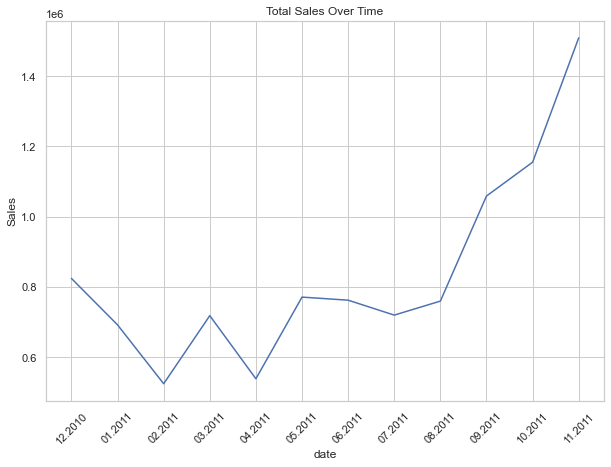

In [29]:
# Create a Line Plot for revenue
ax = pd.DataFrame(m_revenue_df.values).plot(
    grid=True,
    figsize=(10,7),
    legend=False
)

ax.set_xlabel('date')
ax.set_ylabel('Sales')
ax.set_title('Total Sales Over Time')

plt.xticks(
    range(len(m_revenue_df.index)), 
    [x.strftime('%m.%Y') for x in m_revenue_df.index], 
    rotation=45
)

plt.show()

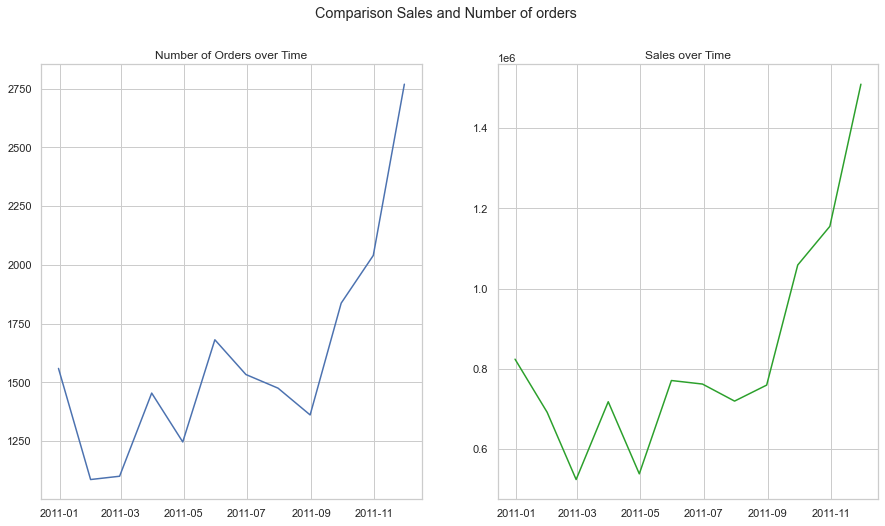

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,8))
fig.suptitle('Comparison Sales and Number of orders')
ax1.plot(m_orders_df1.index, m_orders_df1.values)
ax1.set_title("Number of Orders over Time")
ax2.plot(m_revenue_df.index, m_revenue_df.values, 'tab:green')
ax2.set_title("Sales over Time")
plt.show()

#### Q2 Do you see a similar pattern with the order by month line chart? Comment
#### Answer 2.
Yes, similar pattern can be seen for revenue and orders. Maximum orders were placed for the month of November in 2011 similarly maximum revenue was generated for the same month. Both graphs have similar hikes and drops. Also revenue is directly proportional to the number of orders.

# Repeat Customers

In [31]:
# Run the head function on  the original dataframe
df3.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


#### Q3. What do you notice with the invoice number?
#### Answer 3

One Record represents one product purchased therefore invoice numbers are repeated for in the records. Multiple records represent one order, they all have the same invoice numbers. One invoice number is assigned to one order and one order can contain multiple items. Everytime a customer places a new order, a new invoice number is assigned to it.

### Calculate the repeat customers

In [32]:
# Aggregate the raw data for each Invoice No.
invoice_df = df3.groupby(by=['InvoiceNo', 'InvoiceDate']).agg({
    'Sales': sum,
    'CustomerID': max,
    'Country': max,
}).reset_index()
invoice_df.sort_values('Sales', axis=0, ascending=False,inplace=True, na_position='last')


In [33]:
invoice_df.head()

,InvoiceNo,InvoiceDate,Sales,CustomerID,Country
2118,541431,2011-01-18 10:01:00,77183.60,12346.0,United Kingdom
16963,574941,2011-11-07 17:42:00,52940.94,NaN,United Kingdom
17620,576365,2011-11-14 17:55:00,50653.91,NaN,United Kingdom
8726,556444,2011-06-10 15:28:00,38970.00,15098.0,United Kingdom
13583,567423,2011-09-20 11:05:00,31698.16,17450.0,United Kingdom


In [34]:
#Aggregate by month
#Group by Month and CustomerID. 
# Filter selects customers who have more than one record in the group
# Basically customers with more than one order in a month

m_repeat_customers_df = invoice_df.set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'CustomerID'
]).filter(lambda x: len(x) > 1).resample('M').nunique()['CustomerID']

In [35]:
#c=invoice_df.set_index('InvoiceDate').groupby([
 #   pd.Grouper(freq='M'), 'CustomerID'
#]).count().reset_index()
#c1=c[c['Sales'] > 1]
#Repeat Customers
#c1.set_index('InvoiceDate')['CustomerID'].resample('M').count()
#Total Customers
#c.set_index('InvoiceDate')['CustomerID'].resample('M').count()

In [36]:
m_repeat_customers_df

InvoiceDate
2010-12-31    263
2011-01-31    153
2011-02-28    152
2011-03-31    203
2011-04-30    170
2011-05-31    281
2011-06-30    220
2011-07-31    227
2011-08-31    198
2011-09-30    272
2011-10-31    324
2011-11-30    541
Freq: M, Name: CustomerID, dtype: int64

In [37]:
# Calculate the unique customers
m_unique_customers_df = df3.set_index('InvoiceDate')['CustomerID'].resample('M').nunique()

In [38]:
m_unique_customers_df

InvoiceDate
2010-12-31     885
2011-01-31     741
2011-02-28     758
2011-03-31     974
2011-04-30     856
2011-05-31    1056
2011-06-30     991
2011-07-31     949
2011-08-31     935
2011-09-30    1266
2011-10-31    1364
2011-11-30    1664
Freq: M, Name: CustomerID, dtype: int64

In [39]:
# Compare the repeat and unique customers by month and calculate percentage by month
m_percentage=(m_repeat_customers_df.values/m_unique_customers_df.values)*100
m_percentage

array([29.71751412, 20.64777328, 20.05277045, 20.84188912, 19.85981308,
       26.60984848, 22.19979818, 23.9199157 , 21.17647059, 21.4849921 ,
       23.75366569, 32.51201923])

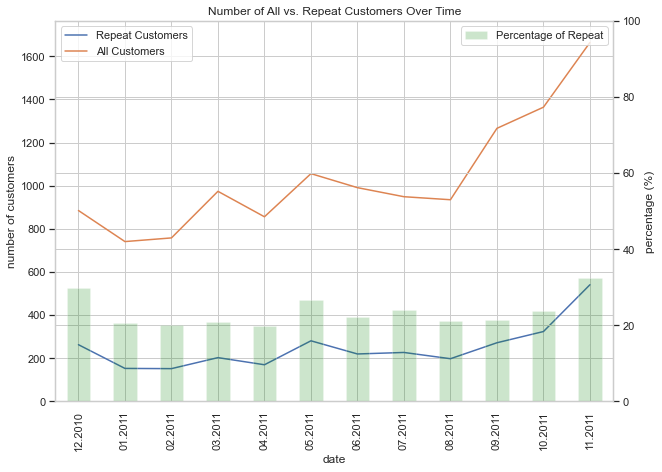

In [40]:
# Visualize these two in a dual axis chart
plot1 = pd.DataFrame(m_repeat_customers_df.values).plot(
    figsize=(10,7))

pd.DataFrame(m_unique_customers_df.values).plot(
    ax=plot1,
    grid=True
)

plot2 = pd.DataFrame(m_percentage).plot.bar(
    ax=plot1,
    grid=True,
    secondary_y=True,# for dual axis with different scale
    color='green',
    alpha=0.2
)

plot1.set_xlabel('date')
plot1.set_ylabel('number of customers')
plot1.set_title('Number of All vs. Repeat Customers Over Time')

plot2.set_ylabel('percentage (%)')

plot1.legend(['Repeat Customers', 'All Customers'])
plot2.legend(['Percentage of Repeat'], loc='upper right')

plot1.set_ylim([0, m_unique_customers_df.values.max()+100])
plot2.set_ylim([0, 100])

plt.xticks(
    range(len(m_repeat_customers_df.index)), 
    [x.strftime('%m.%Y') for x in m_repeat_customers_df.index], 
    rotation=45
)
plt.show()

#### Q4. Comment on the distribution
#### Answer 4.

From the above distribution, it can be inferred that both "All customers" and "Repeat Customers" follow almost similar pattern where a constantly increasing trend can be seen in the last quarter of 2011 from august. We have steady 20% repeat customers throughout the time. The percentage grew higher towards end of year. We have steady 20% repeat customers throughout the time. The percentage grew higher towards end of year.

In [41]:
# Calculate Monthly revenue of repeat customers
m_rev_repeat_customers_df = invoice_df.set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'CustomerID']).filter(lambda x: len(x) > 1).resample('M').sum()['Sales']


In [42]:
# Calculate and show the % of revenue for repeat and all customers by month
m_rev_perc_repeat_customers_df = m_rev_repeat_customers_df/m_revenue_df*100

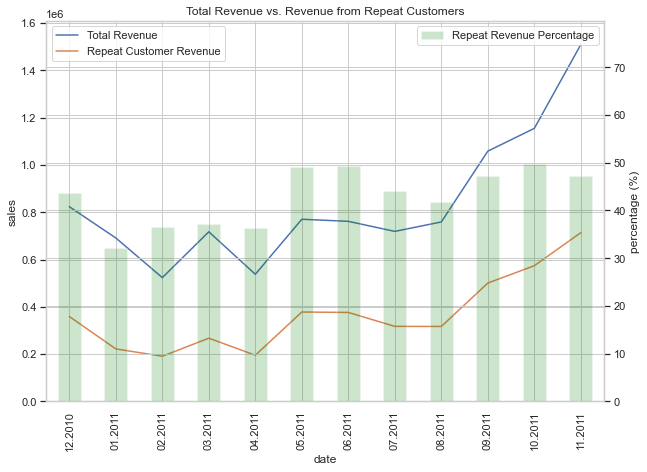

In [43]:
# Plot the  chart for Revenue and % (Dual axis chart)
plot1 = pd.DataFrame(m_revenue_df.values).plot(
    figsize=(10,7))

pd.DataFrame(m_rev_repeat_customers_df.values).plot(
    ax=plot1,
    grid=True
)

plot2 = pd.DataFrame(m_rev_perc_repeat_customers_df.values).plot.bar(
    ax=plot1,
    grid=True,
    secondary_y=True,# for dual axis with different scale
    color='green',
    alpha=0.2
)
plot1.set_xlabel('date')
plot1.set_ylabel('sales')
plot1.set_title('Total Revenue vs. Revenue from Repeat Customers')

plot1.legend(['Total Revenue', 'Repeat Customer Revenue'])

plot1.set_ylim([0, max(m_revenue_df.values)+100000])

plot2.set_ylim([0, max(m_rev_perc_repeat_customers_df.values)+30])
plot2.set_ylabel('percentage (%)')
plot2.legend(['Repeat Revenue Percentage'])

plot2.set_xticklabels([
    x.strftime('%m.%Y') for x in m_rev_perc_repeat_customers_df.index
])

plt.show()

#### Q5. Comment on the distribution
#### Answer 5.

The above distribution is almost similar to the one discussed earlier. The "Total revenue" and "Repeat Customer Revenue" tend to increase for the last quarter of the year starting from September. A constant increase in the revenue can be seen for the last year with "Repeat customer Revenue" holding around 40-50% of the total Revenue. We also that we had 20% repeat customers throughout the year similarly we had 30% revenue due to those customers, the number repeat customers grew towards the end of the year and our revenue grows to nearly 50%.


## Trending Items Over Time (How customers enagage with individual products)

### By Quantity

In [44]:
# Group the datafarme by month with stock code which is really the product ID
m_item_df = pd.DataFrame(df3.set_index('InvoiceDate').groupby([
        pd.Grouper(freq='M'), 'StockCode'
    ])['Quantity'].sum())

In [45]:
m_item_df

Quantity
InvoiceDate StockCode          
2010-12-31  10002           251
            10120            16
            10125           154
            10133           130
            10135           411
...                         ...
2011-11-30  C2               23
            DCGSSGIRL         1
            DOT              47
            M              3891
            POST            462

[31599 rows x 1 columns]

In [46]:
# Lets find out what items were sold the most by quantity on November 30, 2011
# Rank items by the last month sales by sorting by quantity
last_m_sorted_df = m_item_df.loc['2011-11-30'].sort_values(by='Quantity',ascending=False).reset_index()
last_m_sorted_df

,InvoiceDate,StockCode,Quantity
0,2011-11-30,23084,14954
1,2011-11-30,22197,12460
2,2011-11-30,22086,7908
3,2011-11-30,85099B,5909
4,2011-11-30,22578,5366
...,...,...,...
2934,2011-11-30,23140,1
2935,2011-11-30,84952B,1
2936,2011-11-30,22933,1
2937,2011-11-30,90060F,1


### By Sales

In [47]:
# Group the datafarme by month with stock code which is really the product ID and 
# calculate the sales
m_sales_df = pd.DataFrame(df3.set_index('InvoiceDate').groupby([
        pd.Grouper(freq='M'), 'StockCode'])['Sales'].sum())  

# Lets find out what items were sold the most by sales on November 30, 2011
last_m_sales_sorted_df = m_sales_df.loc['2011-11-30'].sort_values(
    by='Sales', ascending=False).reset_index()

In [48]:
print(m_sales_df)

                          Sales
InvoiceDate StockCode          
2010-12-31  10002        234.41
            10120          3.36
            10125         90.86
            10133         85.27
            10135        279.02
...                         ...
2011-11-30  C2          1150.00
            DCGSSGIRL      3.29
            DOT        36905.40
            M           3312.42
            POST       10352.98

[31599 rows x 1 columns]


In [49]:
# Print both the dataframes
print(last_m_sorted_df.head())
print(last_m_sales_sorted_df.head())

  InvoiceDate StockCode  Quantity
0  2011-11-30     23084     14954
1  2011-11-30     22197     12460
2  2011-11-30     22086      7908
3  2011-11-30    85099B      5909
4  2011-11-30     22578      5366
  InvoiceDate StockCode     Sales
0  2011-11-30       DOT  36905.40
1  2011-11-30     23084  34556.72
2  2011-11-30     22086  28985.04
3  2011-11-30     22197  14195.60
4  2011-11-30    85123A  14136.70


In [50]:
details=df3.groupby(by=['InvoiceDate','StockCode']).agg({
    'Sales': sum,
    'Quantity':sum
}).reset_index()
details.sort_values('Quantity', axis=0, ascending=False,inplace=True, na_position='last')
details

,InvoiceDate,StockCode,Sales,Quantity
58784,2011-01-18 10:01:00,23166,77183.60,74215
402804,2011-10-27 12:26:00,84077,1008.00,4800
196544,2011-05-27 10:52:00,22197,3096.00,4300
92918,2011-02-22 10:43:00,22053,3202.92,3906
258453,2011-07-19 17:04:00,18007,191.16,3186
...,...,...,...,...
331041,2011-09-18 15:32:00,23357,4.95,1
92949,2011-02-22 11:02:00,22508,3.75,1
331077,2011-09-18 15:32:00,23559,2.08,1
92934,2011-02-22 11:02:00,21156,1.95,1


In [51]:
# Use the top 5 items by quantity and find the monthly sales for those items 
sc=last_m_sorted_df["StockCode"].head(5)
sc

m_item_df = pd.DataFrame(
    df3.loc[
        df3['StockCode'].isin(sc)
    ].set_index('InvoiceDate').groupby([
        pd.Grouper(freq='M'), 'StockCode'
    ])['Sales'].sum()
)
m_item_df

Sales
InvoiceDate StockCode          
2010-12-31  22086       9225.80
            22197       2630.79
            22578        162.00
            85099B      4019.15
2011-01-31  22086        143.32
            22197       1495.48
            22578          1.63
            85099B      5047.65
2011-02-28  22086         24.95
            22197       2127.00
            85099B      5617.24
2011-03-31  22086        232.01
            22197       3032.81
            85099B     10118.38
2011-04-30  22086         44.03
            22197       1495.57
            85099B      4878.08
2011-05-31  22086         65.19
            22197       5151.63
            23084       2279.57
            85099B      7122.73
2011-06-30  22086        910.88
            22197       1706.91
            23084       3326.87
            85099B      7247.98
2011-07-31  22086       1077.93
            22197       1540.00
            22578         90.95
            23084        668.59
            85099B      6253.87
2011-08-31  22086       1334.94
            22197       4133.35
            22578         11.05
            23084       3533.57
            85099B     10796.56
2011-09-30  22086       6006.10
            22197       3607.13
            22578        451.99
            23084        699.78
            85099B      8884.33
2011-10-31  22086      10031.39
            22197       4813.95
            22578        788.32
            23084      12256.87
            85099B     10485.81
2011-11-30  22086      28985.04
            22197      14195.60
            22578       1787.50
            23084      34556.72
            85099B     11641.37

In [52]:
# Use the top 5 items by quantity and find the monthly sales for those items 
#m_item_df = pd.DataFrame(
   # df3.loc[
        #df3['StockCode'].isin([23084, 84826, 22197, 22086, '85099B'])
  #  ].set_index('InvoiceDate').groupby([
    #    pd.Grouper(freq='M'), 'StockCode'
    #])['Sales'].sum()
#)
#m_item_df

In [53]:
# transform this data into a tabular format where columns are the individual 
# stock codes and the rows are the invoice dates
items_df = m_item_df.reset_index().pivot('InvoiceDate','StockCode').fillna(0)
items_df = items_df.reset_index()
items_df = items_df.set_index('InvoiceDate')
items_df.columns = items_df.columns.droplevel(0)

In [54]:
items_df

StockCode,22086,22197,22578,23084,85099B
InvoiceDate,,,,,
2010-12-31,9225.80,2630.79,162.00,0.00,4019.15
2011-01-31,143.32,1495.48,1.63,0.00,5047.65
2011-02-28,24.95,2127.00,0.00,0.00,5617.24
2011-03-31,232.01,3032.81,0.00,0.00,10118.38
2011-04-30,44.03,1495.57,0.00,0.00,4878.08
2011-05-31,65.19,5151.63,0.00,2279.57,7122.73
2011-06-30,910.88,1706.91,0.00,3326.87,7247.98
2011-07-31,1077.93,1540.00,90.95,668.59,6253.87
2011-08-31,1334.94,4133.35,11.05,3533.57,10796.56


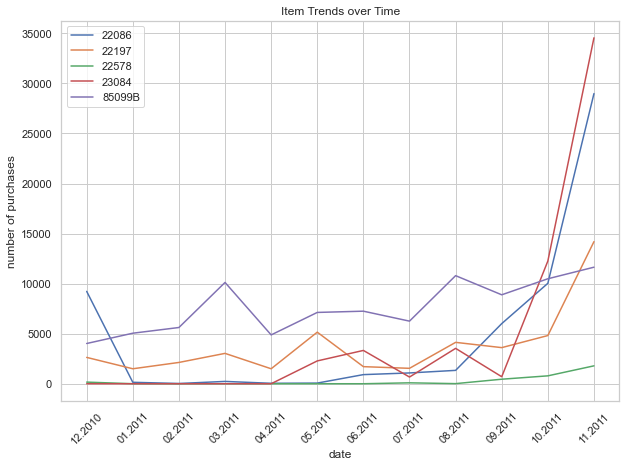

In [55]:
# Time series plot for the top 5 items
plot1 = pd.DataFrame(items_df.values).plot(
    figsize=(10,7),
    grid=True,
)

plot1.set_ylabel('number of purchases')
plot1.set_xlabel('date')
plot1.set_title('Item Trends over Time')

plot1.legend(items_df.columns, loc='upper left')

plt.xticks(
    range(len(items_df.index)), 
    [x.strftime('%m.%Y') for x in items_df.index], 
    rotation=45
)

plt.show()

#### Q6. What do you observe?
#### Answer 6.

From the above illustration of top 5 selling products, a sudden spike in all the products can be seen for the last quarter of the year. Almost all the products did well during that duration except the product with the stock code of **22578**. The product 23084 did the best. however it had almost 0 purchases till April, small staggered jumps from april to september and then a sudden spike making it the best selling product. Further studies can be conducted to identify what led in the sudden increase in the purchases such as what type of product it is? is that an organic purchase? and outcome of a campaign? or users increased interest on the product? Sales of 22086 follows the similar trend as that of 23084 making it the second best product. The other two products 22197, 85099B follow usual trend but have spikes at different times of the year. They both also see the increase in November. However sales of 22578 don't show any steep climb at the end of the year. So, some products may be more in demand at the end of the year than others.

In [56]:
# Use the top 5 items by quantity and find the monthly sales for those items 
#Calculated the top5 Quantity for all the year
top5q=details["StockCode"].head(5)
top5q

top5 = pd.DataFrame(
    df3.loc[
        df3['StockCode'].isin(top5q)
    ].set_index('InvoiceDate').groupby([
        pd.Grouper(freq='M'), 'StockCode'
    ])['Sales'].sum()
)
top5

Sales
InvoiceDate StockCode          
2010-12-31  18007         15.00
            22053         12.50
            22197       2630.79
            84077       1174.13
2011-01-31  18007          6.45
            22053          6.25
            22197       1495.48
            23166      77183.60
            84077        387.13
2011-02-28  18007        151.02
            22053       3302.92
            22197       2127.00
            84077        820.79
2011-03-31  18007          9.78
            22053        188.50
            22197       3032.81
            84077        943.20
2011-04-30  18007          4.74
            22053         35.00
            22197       1495.57
            84077       2290.89
2011-05-31  18007          8.70
            22053          7.50
            22197       5151.63
            23166        891.18
            84077       1252.59
2011-06-30  18007          4.74
            22053         12.50
            22197       1706.91
            23166        473.27
            84077        594.72
2011-07-31  18007        195.18
            22197       1540.00
            23166        857.71
            84077       1049.94
2011-08-31  22053          2.50
            22197       4133.35
            23166        540.21
            84077        657.39
2011-09-30  22197       3607.13
            23166        407.10
            84077       1002.77
2011-10-31  22053         25.00
            22197       4813.95
            23166        320.57
            84077       1957.76
2011-11-30  22053         13.75
            22197      14195.60
            23166        774.57
            84077       1331.37

In [57]:
# transform this data into a tabular format where columns are the individual 
# stock codes and the rows are the invoice dates
top5_items =top5.reset_index().pivot('InvoiceDate','StockCode').fillna(0)
top5_items = top5_items.reset_index()
top5_items = top5_items.set_index('InvoiceDate')
top5_items.columns = top5_items.columns.droplevel(0)
top5_items

StockCode,18007,22053,22197,23166,84077
InvoiceDate,,,,,
2010-12-31,15.00,12.50,2630.79,0.00,1174.13
2011-01-31,6.45,6.25,1495.48,77183.60,387.13
2011-02-28,151.02,3302.92,2127.00,0.00,820.79
2011-03-31,9.78,188.50,3032.81,0.00,943.20
2011-04-30,4.74,35.00,1495.57,0.00,2290.89
2011-05-31,8.70,7.50,5151.63,891.18,1252.59
2011-06-30,4.74,12.50,1706.91,473.27,594.72
2011-07-31,195.18,0.00,1540.00,857.71,1049.94
2011-08-31,0.00,2.50,4133.35,540.21,657.39


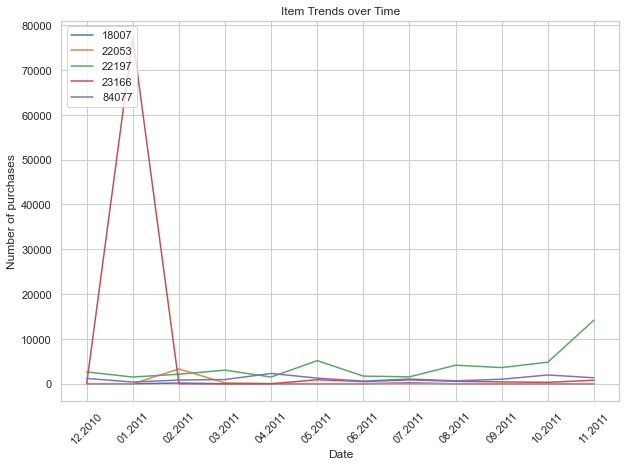

In [58]:
# Time series plot for the top 5 items
plot1 = pd.DataFrame(top5_items.values).plot(
    figsize=(10,7),
    grid=True,
)

plot1.set_ylabel('Number of purchases')
plot1.set_xlabel('Date')
plot1.set_title('Item Trends over Time')

plot1.legend(top5_items.columns, loc='upper left')

plt.xticks(
    range(len(top5_items.index)), 
    [x.strftime('%m.%Y') for x in top5_items.index], 
    rotation=45
)

plt.show()

In [59]:
print(last_m_sales_sorted_df.head())

  InvoiceDate StockCode     Sales
0  2011-11-30       DOT  36905.40
1  2011-11-30     23084  34556.72
2  2011-11-30     22086  28985.04
3  2011-11-30     22197  14195.60
4  2011-11-30    85123A  14136.70


In [60]:
# Use the top 5 items by sales and find the monthly sales for those items 
sales_c=last_m_sales_sorted_df["StockCode"].head(5)
sales_c
m_sales_df = pd.DataFrame(
    df3.loc[
        #df3['StockCode'].isin(['DOT', 23084, 22806, 22197, '85123A'])
        df3['StockCode'].isin(sales_c)
    ].set_index('InvoiceDate').groupby([
        pd.Grouper(freq='M'), 'StockCode'
    ])['Sales'].sum()
)
m_sales_df

Sales
InvoiceDate StockCode          
2010-12-31  22086       9225.80
            22197       2630.79
            85123A     10435.36
            DOT        24671.19
2011-01-31  22086        143.32
            22197       1495.48
            85123A     15223.21
            DOT        13921.82
2011-02-28  22086         24.95
            22197       2127.00
            85123A      5140.11
            DOT        10060.57
2011-03-31  22086        232.01
            22197       3032.81
            85123A      5597.90
            DOT        11829.71
2011-04-30  22086         44.03
            22197       1495.57
            85123A     10017.79
            DOT         7535.38
2011-05-31  22086         65.19
            22197       5151.63
            23084       2279.57
            85123A     11216.42
            DOT        10229.30
2011-06-30  22086        910.88
            22197       1706.91
            23084       3326.87
            85123A      4680.81
            DOT        11848.66
2011-07-31  22086       1077.93
            22197       1540.00
            23084        668.59
            85123A      8504.11
            DOT        12841.00
2011-08-31  22086       1334.94
            22197       4133.35
            23084       3533.57
            85123A      5620.57
            DOT        13400.52
2011-09-30  22086       6006.10
            22197       3607.13
            23084        699.78
            85123A      6957.46
            DOT        15177.40
2011-10-31  22086      10031.39
            22197       4813.95
            23084      12256.87
            85123A      4761.95
            DOT        17955.13
2011-11-30  22086      28985.04
            22197      14195.60
            23084      34556.72
            85123A     14136.70
            DOT        36905.40

In [61]:
# Use the top 5 items by sales and find the monthly sales for those items 
top5_by_sales = np.array(pd.DataFrame(df3.groupby(['StockCode'])['Sales'].sum()).sort_values(by='Sales', ascending=False)[0:5].index)

mtop5_by_sales_df = pd.DataFrame(
    df3.loc[
        df['StockCode'].isin(top5_by_sales)
    ].set_index('InvoiceDate').groupby([
        pd.Grouper(freq='M'), 'StockCode'
    ])['Sales'].sum()
)

mtop5_by_sales_df

Sales
InvoiceDate StockCode          
2010-12-31  22423      27869.96
            47566       1207.74
            85099B      4019.15
            85123A     10435.36
            DOT        24671.19
2011-01-31  22423      12800.60
            47566       2288.36
            85099B      5047.65
            85123A     15223.21
            DOT        13921.82
2011-02-28  22423      11009.49
            47566       4347.90
            85099B      5617.24
            85123A      5140.11
            DOT        10060.57
2011-03-31  22423      18372.00
            47566       9123.02
            85099B     10118.38
            85123A      5597.90
            DOT        11829.71
2011-04-30  22423      14812.95
            47566      10778.47
            85099B      4878.08
            85123A     10017.79
            DOT         7535.38
2011-05-31  22423      12645.97
            47566      19147.75
            85099B      7122.73
            85123A     11216.42
            DOT        10229.30
2011-06-30  22423       9745.39
            47566      12561.07
            85099B      7247.98
            85123A      4680.81
            DOT        11848.66
2011-07-31  22423      13987.11
            47566      14576.50
            85099B      6253.87
            85123A      8504.11
            DOT        12841.00
2011-08-31  22423      10534.05
            47566       9694.85
            85099B     10796.56
            85123A      5620.57
            DOT        13400.52
2011-09-30  22423       9619.53
            47566       6402.95
            85099B      8884.33
            85123A      6957.46
            DOT        15177.40
2011-10-31  22423      13281.24
            47566       3716.48
            85099B     10485.81
            85123A      4761.95
            DOT        17955.13
2011-11-30  22423      13799.58
            47566       4740.76
            85099B     11641.37
            85123A     14136.70
            DOT        36905.40

In [62]:
# transform this data into a tabular format where columns are the individual 
# stock codes and the rows are the invoice dates
s_items_df = m_sales_df.reset_index().pivot('InvoiceDate','StockCode').fillna(0)
s_items_df = s_items_df.reset_index()
s_items_df = s_items_df.set_index('InvoiceDate')
s_items_df.columns = s_items_df.columns.droplevel(0)

s_items_df

StockCode,22086,22197,23084,85123A,DOT
InvoiceDate,,,,,
2010-12-31,9225.80,2630.79,0.00,10435.36,24671.19
2011-01-31,143.32,1495.48,0.00,15223.21,13921.82
2011-02-28,24.95,2127.00,0.00,5140.11,10060.57
2011-03-31,232.01,3032.81,0.00,5597.90,11829.71
2011-04-30,44.03,1495.57,0.00,10017.79,7535.38
2011-05-31,65.19,5151.63,2279.57,11216.42,10229.30
2011-06-30,910.88,1706.91,3326.87,4680.81,11848.66
2011-07-31,1077.93,1540.00,668.59,8504.11,12841.00
2011-08-31,1334.94,4133.35,3533.57,5620.57,13400.52


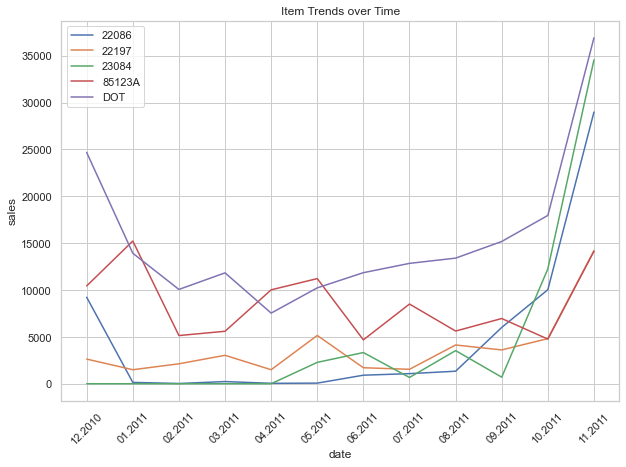

In [63]:
# Time series plot for the top 5 items
plot1 = pd.DataFrame(s_items_df.values).plot(
    figsize=(10,7),
    grid=True,
)

plot1.set_ylabel('sales')
plot1.set_xlabel('date')
plot1.set_title('Item Trends over Time')

plot1.legend(s_items_df.columns, loc='upper left')

plt.xticks(
    range(len(s_items_df.index)), 
    [x.strftime('%m.%Y') for x in s_items_df.index], 
    rotation=45
)

plt.show()

#### Q7. What do you observe?
#### ANswer 7.

- DOT is the product with highest sales value overall however had some falls in the month of January and April
- 22197 is the product with lowest sales.
- 23084 and 22086 has nearly 0 sales till april then with some variations in the sales over the next few months, increased rapidly making it the second & third largest selling product respectively
- 85123A has peaks and lows throughout the year

In [64]:
# Drop NaN records
df = df3[pd.notnull(df3['CustomerID'])]

In [65]:
df.shape

(380580, 9)

In [66]:
 # Summarize the data for each order or InvoiceNo

orders_df = df.groupby(['CustomerID', 'InvoiceNo']).agg({
            'Sales': sum,
            'InvoiceDate': max
        })

In [67]:
orders_df

Sales         InvoiceDate
CustomerID InvoiceNo                              
12346.0    541431     77183.60 2011-01-18 10:01:00
12347.0    537626       711.79 2010-12-07 14:57:00
           542237       475.39 2011-01-26 14:30:00
           549222       636.25 2011-04-07 10:43:00
           556201       382.52 2011-06-09 13:01:00
...                        ...                 ...
18283.0    578262       313.65 2011-11-23 13:27:00
           579673       223.61 2011-11-30 12:59:00
18287.0    554065       765.28 2011-05-22 10:39:00
           570715      1001.32 2011-10-12 10:23:00
           573167        70.68 2011-10-28 09:29:00

[17754 rows x 2 columns]

In [68]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


#### Q8. Comment on the results of product analytics and  Customer Analytics from a marketing perspective
#### Answer 8.

1. Sales usually peak during the month of November and December, however its only some of the products that are high in demand during the end of the year, focus on marketing, stocking those items.
2. Repeat customers consist of the 20% of the customers however they contribute only around 30 to 47% of the total revenue that means the
- Acquire new customers  
- Increase sales through existing customers
- Work to identify losing/dormant customers and try to retain them. 
- There are some very high value customers who seem to not have returned engage them
- Carry out RFM analysis on customers
3. According to the data, sales are up at the end of the year, run selective campaign to concentrate on high selling products, increase profit margin, promote sales for products that don’t show any sales throughout the year if they are not seasonal product.

4. Analyzing product popularity trends and changes can help us better understand what our customers prefer and buy. 
5. We can then make use of targeted audience campaigns and different marketing strategies to fill in the gap. 
6. Product Analysis can also help us in identifying the trends among the user so that we can be better prepared for the upcoming surge in the purchasing beforehand. All of these can be applied to get a better conversion rate.
7. Customer analytics drive sales, marketing, and product development efforts for firm

In [69]:
 # Summarize the data for each order or InvoiceNo

clients_df = df.groupby(['CustomerID']).agg({
            'Sales': sum,
            'Quantity': max,
            'InvoiceNo': len,
            'InvoiceDate': max
        })
clients_df

,Sales,Quantity,InvoiceNo,InvoiceDate
CustomerID,,,,
12346.0,77183.60,74215,1,2011-01-18 10:01:00
12347.0,4085.18,240,171,2011-10-31 12:25:00
12348.0,1797.24,144,31,2011-09-25 13:13:00
12349.0,1757.55,36,73,2011-11-21 09:51:00
12350.0,334.40,24,17,2011-02-02 16:01:00
...,...,...,...,...
18280.0,180.60,8,10,2011-03-07 09:52:00
18281.0,80.82,12,7,2011-06-12 10:53:00
18282.0,100.21,48,7,2011-08-05 13:35:00


In [70]:
clients_df.sort_values(by='Sales', ascending=False).head(20)

,Sales,Quantity,InvoiceNo,InvoiceDate
CustomerID,,,,
14646.0,268478.00,2400,1990,2011-11-23 11:06:00
18102.0,248171.76,1008,408,2011-11-28 12:55:00
17450.0,192988.39,1944,332,2011-11-29 09:56:00
14911.0,136846.14,640,5356,2011-11-30 15:08:00
12415.0,124914.53,1152,714,2011-11-15 14:22:00
14156.0,117379.63,1440,1400,2011-11-30 10:54:00
17511.0,83683.06,600,890,2011-11-23 10:31:00
16029.0,81024.84,2400,242,2011-11-01 10:27:00
12346.0,77183.60,74215,1,2011-01-18 10:01:00


### Calculate CLV & Product

In [71]:
data=df3.groupby('CustomerID').agg({'InvoiceNo': lambda num: len(num),
                                        'Quantity': lambda quant: quant.sum(),
                                        'Sales': lambda Sales: Sales.sum(),
                                        'InvoiceDate': lambda date: (date.max() - date.min()).days
                                    })
data=data.reindex()
data

,InvoiceNo,Quantity,Sales,InvoiceDate
CustomerID,,,,
12346.0,1,74215,77183.60,0
12347.0,171,2266,4085.18,327
12348.0,31,2341,1797.24,282
12349.0,73,631,1757.55,0
12350.0,17,197,334.40,0
...,...,...,...,...
18280.0,10,45,180.60,0
18281.0,7,54,80.82,0
18282.0,7,75,100.21,0


In [72]:
data.sort_values('Sales', axis=0, ascending=False,inplace=True, na_position='last')
data.columns=['num_transactions','num_units','spent_money','num_days']
data

,num_transactions,num_units,spent_money,num_days
CustomerID,,,,
14646.0,1990,188957,268478.00,338
18102.0,408,61426,248171.76,355
17450.0,332,69273,192988.39,357
14911.0,5356,76319,136846.14,364
12415.0,714,77374,124914.53,313
...,...,...,...,...
17956.0,1,1,12.75,0
16454.0,2,3,6.90,19
14792.0,2,2,6.20,0


In [73]:
# Calculate CLTV using following formula:
# CLTV = ((Average Order Value x Purchase Frequency)/Churn Rate) x Profit margin.
# Customer Value = Average Order Value * Purchase Frequency
# Average Order Value = Total Revenue / Total Number of Orders
# Purchase Frequency =  Total Number of Orders / Total Number of Customers

data['avg_order_value']=data['spent_money']/data['num_transactions']
purchase_frequency=sum(data['num_transactions'])/data.shape[0]
repeat_rate=data[data.num_transactions > 1].shape[0]/data.shape[0]
churn_rate=1-repeat_rate
data['profit_margin']=data['spent_money']*0.05
data['CLV']=(data['avg_order_value']*purchase_frequency)/churn_rate
data

,num_transactions,num_units,spent_money,num_days,avg_order_value,profit_margin,CLV
CustomerID,,,,,,,
14646.0,1990,188957,268478.00,338,134.913568,13423.9000,7.441363e+05
18102.0,408,61426,248171.76,355,608.264118,12408.5880,3.354973e+06
17450.0,332,69273,192988.39,357,581.290331,9649.4195,3.206195e+06
14911.0,5356,76319,136846.14,364,25.550063,6842.3070,1.409253e+05
12415.0,714,77374,124914.53,313,174.950322,6245.7265,9.649651e+05
...,...,...,...,...,...,...,...
17956.0,1,1,12.75,0,12.750000,0.6375,7.032457e+04
16454.0,2,3,6.90,19,3.450000,0.3450,1.902900e+04
14792.0,2,2,6.20,0,3.100000,0.3100,1.709852e+04


In [74]:
# Group the datafarme by month with stock code which is really the product ID
items = df3.groupby('StockCode').agg({'Quantity': lambda quant: quant.sum()})
items.sort_values('Quantity', axis=0, ascending=False,inplace=True, na_position='last')
items

,Quantity
StockCode,
23166,77826
84077,53680
22197,50704
85099B,47369
85123A,36845
...,...
90135A,1
22146,1
84031a,1


In [75]:
sales=df3
sales.drop(['Description','Country'], axis=1, inplace=True)
sales['InvoiceDate']=pd.to_datetime(df2['InvoiceDate'])
sales['InvoiceDate'] = sales['InvoiceDate'].apply(lambda x: x.strftime('%b-%Y'))
sales

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Sales
0,536365,85123A,6,Dec-2010,2.55,17850.0,15.30
1,536365,71053,6,Dec-2010,3.39,17850.0,20.34
2,536365,84406B,8,Dec-2010,2.75,17850.0,22.00
3,536365,84029G,6,Dec-2010,3.39,17850.0,20.34
4,536365,84029E,6,Dec-2010,3.39,17850.0,20.34
...,...,...,...,...,...,...,...
516364,579885,85034C,4,Nov-2011,1.25,15444.0,5.00
516365,579885,21742,2,Nov-2011,5.95,15444.0,11.90
516366,579885,23084,6,Nov-2011,2.08,15444.0,12.48
516367,579885,21257,1,Nov-2011,7.95,15444.0,7.95


In [76]:
sales_new=sales.pivot_table(index=['CustomerID'],columns=['InvoiceDate'],values='Sales',aggfunc='sum',fill_value=0).reset_index()
sales_new.head()

InvoiceDate,CustomerID,Apr-2011,Aug-2011,Dec-2010,Feb-2011,Jan-2011,Jul-2011,Jun-2011,Mar-2011,May-2011,Nov-2011,Oct-2011,Sep-2011
0,12346.0,0.00,0.00,0.00,0.0,77183.60,0.0,0.00,0.0,0.0,0.00,0.00,0.0
1,12347.0,636.25,584.91,711.79,0.0,475.39,0.0,382.52,0.0,0.0,0.00,1294.32,0.0
2,12348.0,367.00,0.00,892.80,0.0,227.44,0.0,0.00,0.0,0.0,0.00,0.00,310.0
3,12349.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,1757.55,0.00,0.0
4,12350.0,0.00,0.00,0.00,334.4,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.0


In [77]:
sales_new['CLV']=sales_new.iloc[:,2:].sum(axis=1)

<AxesSubplot:xlabel='CLV', ylabel='Density'>

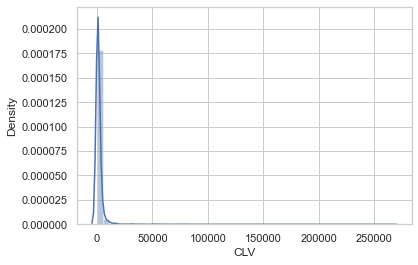

In [78]:
sns.distplot(sales_new['CLV'],kde=True)

#### Calculate Frequency, Recency, and Total Amount of purchases by each customer

In [79]:
# Group first by Customer ID first and then aggregate by sales and Invoice Date
def groupby_mean(x):
    return x.mean()

def groupby_count(x):
    return x.count()

def purchase_duration(x):
    return (x.max() - x.min()).days

def avg_frequency(x):
    return (x.max() - x.min()).days/x.count()

groupby_mean.__name__ = 'avg'
groupby_count.__name__ = 'count'
purchase_duration.__name__ = 'purchase_duration'
avg_frequency.__name__ = 'purchase_frequency'


summary_df = orders_df.reset_index().groupby('CustomerID').agg({
    'Sales': [min, max, sum, groupby_mean, groupby_count],
    'InvoiceDate': [min, max, purchase_duration, avg_frequency]
})

In [80]:
summary_df.head()

Sales                                          \
                 min       max       sum           avg count   
CustomerID                                                     
12346.0     77183.60  77183.60  77183.60  77183.600000     1   
12347.0       382.52   1294.32   4085.18    680.863333     6   
12348.0       227.44    892.80   1797.24    449.310000     4   
12349.0      1757.55   1757.55   1757.55   1757.550000     1   
12350.0       334.40    334.40    334.40    334.400000     1   

                   InvoiceDate                                        \
                           min                 max purchase_duration   
CustomerID                                                             
12346.0    2011-01-18 10:01:00 2011-01-18 10:01:00                 0   
12347.0    2010-12-07 14:57:00 2011-10-31 12:25:00               327   
12348.0    2010-12-16 19:09:00 2011-09-25 13:13:00               282   
12349.0    2011-11-21 09:51:00 2011-11-21 09:51:00                 0   
12350.0    2011-02-02 16:01:00 2011-02-02 16:01:00                 0   

                               
           purchase_frequency  
CustomerID                     
12346.0                   0.0  
12347.0                  54.5  
12348.0                  70.5  
12349.0                   0.0  
12350.0                   0.0

In [81]:
# Distribution of the number of purchases that the repeat customers have made
summary_df.columns = ['_'.join(col) for col in summary_df.columns]
summary_df = summary_df.loc[summary_df['InvoiceDate_purchase_duration'] > 1]

In [82]:
summary_df.head()

,Sales_min,Sales_max,Sales_sum,Sales_avg,Sales_count,InvoiceDate_min,InvoiceDate_max,InvoiceDate_purchase_duration,InvoiceDate_purchase_frequency
CustomerID,,,,,,,,,
12347.0,382.52,1294.32,4085.18,680.863333,6,2010-12-07 14:57:00,2011-10-31 12:25:00,327,54.500000
12348.0,227.44,892.80,1797.24,449.310000,4,2010-12-16 19:09:00,2011-09-25 13:13:00,282,70.500000
12352.0,120.33,840.30,2506.04,313.255000,8,2011-02-16 12:33:00,2011-11-03 14:37:00,260,32.500000
12356.0,58.35,2271.62,2811.43,937.143333,3,2011-01-18 09:50:00,2011-11-17 08:40:00,302,100.666667
12359.0,547.50,2876.85,6372.58,1593.145000,4,2011-01-12 12:43:00,2011-10-13 12:47:00,274,68.500000


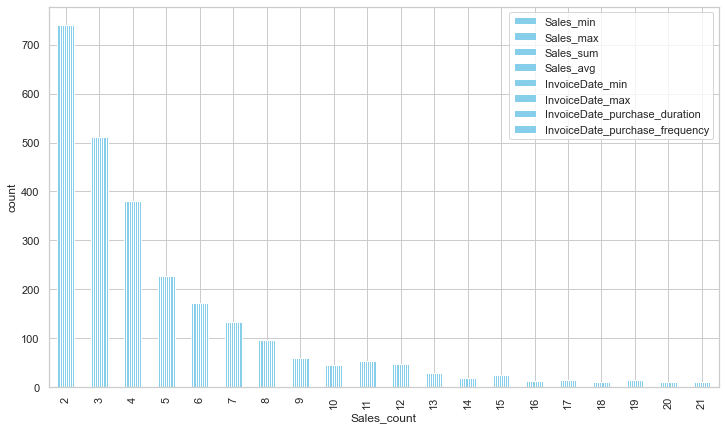

In [83]:
# Group by sales_count and plot the sales_count with customers with more than 1 purchase

ax = summary_df.groupby('Sales_count').count()[:20].plot(
    kind='bar', 
    color='skyblue',
    figsize=(12,7), 
    grid=True
)

ax.set_ylabel('count')

plt.show()

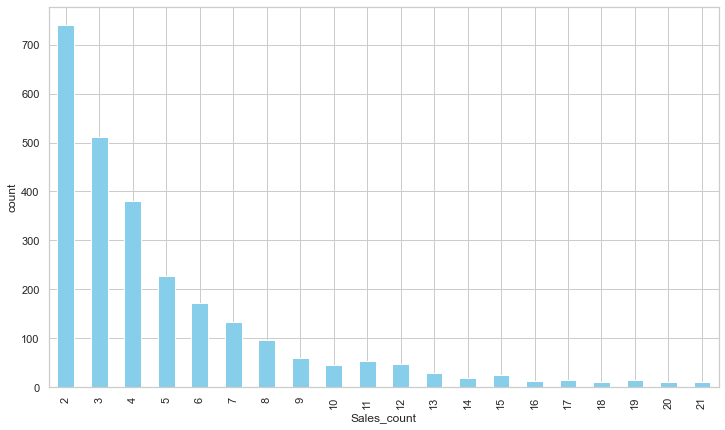

In [84]:
ax = summary_df.groupby('Sales_count').count()['Sales_sum'][:20].plot(
    kind='bar', 
    color='skyblue',
    figsize=(12,7), 
    grid=True
)

ax.set_ylabel('count')

plt.show()

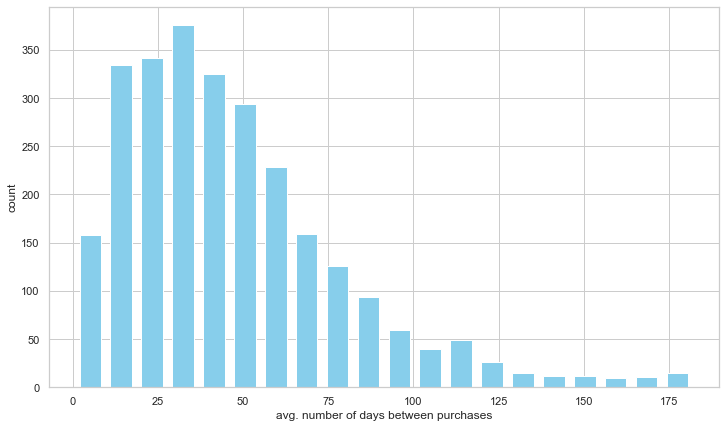

In [85]:
# Average number of days between purchases for these repeat customers

ax = summary_df['InvoiceDate_purchase_frequency'].hist(
    bins=20,
    color='skyblue',
    rwidth=0.7,
    figsize=(12,7)
)

ax.set_xlabel('avg. number of days between purchases')
ax.set_ylabel('count')

plt.show()

### Predict 3 Month Customer Lifetime Value (CLV)

In [86]:
clv_freq = '3M'

In [87]:
# Break down data into 3 months chunk
# https://pbpython.com/pandas-grouper-agg.html more info 
data_df = orders_df.reset_index().groupby([
    'CustomerID',
    pd.Grouper(key='InvoiceDate', freq='3M')
]).agg({
    'Sales': [sum, groupby_mean, groupby_count],
})

data_df.columns = ['_'.join(col) for col in data_df.columns]
data_df = data_df.reset_index()

In [88]:
data_df.head(10)

,CustomerID,InvoiceDate,Sales_sum,Sales_avg,Sales_count
0,12346.0,2011-03-31,77183.60,77183.600,1
1,12347.0,2010-12-31,711.79,711.790,1
2,12347.0,2011-03-31,475.39,475.390,1
3,12347.0,2011-06-30,1018.77,509.385,2
4,12347.0,2011-09-30,584.91,584.910,1
5,12347.0,2011-12-31,1294.32,1294.320,1
6,12348.0,2010-12-31,892.80,892.800,1
7,12348.0,2011-03-31,227.44,227.440,1
8,12348.0,2011-06-30,367.00,367.000,1
9,12348.0,2011-09-30,310.00,310.000,1


In [89]:
# Encode the InvoiceDate column
date_month_map = {
    str(x)[:10]: 'M_%s' % (i+1) for i, x in enumerate(
        sorted(data_df.reset_index()['InvoiceDate'].unique(), reverse=True)
    )
}

data_df['M'] = data_df['InvoiceDate'].apply(lambda x: date_month_map[str(x)[:10]])

In [90]:
data_df.head(10)

,CustomerID,InvoiceDate,Sales_sum,Sales_avg,Sales_count,M
0,12346.0,2011-03-31,77183.60,77183.600,1,M_4
1,12347.0,2010-12-31,711.79,711.790,1,M_5
2,12347.0,2011-03-31,475.39,475.390,1,M_4
3,12347.0,2011-06-30,1018.77,509.385,2,M_3
4,12347.0,2011-09-30,584.91,584.910,1,M_2
5,12347.0,2011-12-31,1294.32,1294.320,1,M_1
6,12348.0,2010-12-31,892.80,892.800,1,M_5
7,12348.0,2011-03-31,227.44,227.440,1,M_4
8,12348.0,2011-06-30,367.00,367.000,1,M_3
9,12348.0,2011-09-30,310.00,310.000,1,M_2


In [91]:
# Transform this data into tabular data, where the rows represent the individual customers and the columns represent each feature using Pivot table
features_df = pd.pivot_table(
    data_df.loc[data_df['M'] != 'M_1'], 
    values=['Sales_sum', 'Sales_avg', 'Sales_count'], 
    columns='M', 
    index='CustomerID'
)

features_df.columns = ['_'.join(col) for col in features_df.columns]

In [92]:
features_df = features_df.fillna(0)
features_df.head()

,Sales_avg_M_2,Sales_avg_M_3,Sales_avg_M_4,Sales_avg_M_5,Sales_count_M_2,Sales_count_M_3,Sales_count_M_4,Sales_count_M_5,Sales_sum_M_2,Sales_sum_M_3,Sales_sum_M_4,Sales_sum_M_5
CustomerID,,,,,,,,,,,,
12346.0,0.00,0.000,77183.600,0.00,0.0,0.0,1.0,0.0,0.00,0.00,77183.60,0.00
12347.0,584.91,509.385,475.390,711.79,1.0,2.0,1.0,1.0,584.91,1018.77,475.39,711.79
12348.0,310.00,367.000,227.440,892.80,1.0,1.0,1.0,1.0,310.00,367.00,227.44,892.80
12350.0,0.00,0.000,334.400,0.00,0.0,0.0,1.0,0.0,0.00,0.00,334.40,0.00
12352.0,316.25,0.000,312.362,0.00,2.0,0.0,5.0,0.0,632.50,0.00,1561.81,0.00


In [93]:
# last 3 months 'M1' group and Sales_sum as the target variable as we want to prdict sales for 3 months
response_df = data_df.loc[
    data_df['M'] == 'M_1',
    ['CustomerID', 'Sales_sum']
]

response_df.columns = ['CustomerID', 'CLV_'+'3M']
response_df.head(10)

,CustomerID,CLV_3M
5,12347.0,1294.32
10,12349.0,1757.55
14,12352.0,311.73
20,12356.0,58.35
21,12357.0,6207.67
25,12359.0,2876.85
28,12360.0,1043.78
33,12362.0,2119.85
37,12364.0,299.06
41,12370.0,739.28


In [94]:
 # Combine the 2 sets together
sample_set_df = features_df.merge(
    response_df, 
    left_index=True, 
    right_on='CustomerID',
    how='left'
)

sample_set_df = sample_set_df.fillna(0)
sample_set_df.head()

,Sales_avg_M_2,Sales_avg_M_3,Sales_avg_M_4,Sales_avg_M_5,Sales_count_M_2,Sales_count_M_3,Sales_count_M_4,Sales_count_M_5,Sales_sum_M_2,Sales_sum_M_3,Sales_sum_M_4,Sales_sum_M_5,CustomerID,CLV_3M
NaN,0.00,0.000,77183.600,0.00,0.0,0.0,1.0,0.0,0.00,0.00,77183.60,0.00,12346.0,0.00
5.0,584.91,509.385,475.390,711.79,1.0,2.0,1.0,1.0,584.91,1018.77,475.39,711.79,12347.0,1294.32
NaN,310.00,367.000,227.440,892.80,1.0,1.0,1.0,1.0,310.00,367.00,227.44,892.80,12348.0,0.00
NaN,0.00,0.000,334.400,0.00,0.0,0.0,1.0,0.0,0.00,0.00,334.40,0.00,12350.0,0.00
14.0,316.25,0.000,312.362,0.00,2.0,0.0,5.0,0.0,632.50,0.00,1561.81,0.00,12352.0,311.73


### Linear Regression

In [95]:
from sklearn.model_selection import train_test_split

target_var = 'CLV_'+'3M'
all_features = [x for x in sample_set_df.columns if x not in ['CustomerID', target_var]]

x_train, x_test, y_train, y_test = train_test_split(
    sample_set_df[all_features], 
    sample_set_df[target_var], 
    test_size=0.2
)

from sklearn.linear_model import LinearRegression

reg_fit = LinearRegression()
reg_fit.fit(x_train, y_train)

# Calculate the intercept
print(reg_fit.intercept_)

# Calculate the coefficient
print(reg_fit.coef_)

coef=pd.DataFrame(list(zip(all_features, reg_fit.coef_)))
coef.columns =['feature', 'coef']



87.19889008749163
[ 3.59169694e-01 -5.29949826e-01  2.26230084e-01 -1.10810815e+00
  4.06181096e+01  3.75005741e+00 -8.05695618e+01 -1.61345644e+02
  1.58226955e-01  3.52352125e-01  2.35341673e-01  1.38243370e+00]


In [96]:
coef

,feature,coef
0,Sales_avg_M_2,0.359170
1,Sales_avg_M_3,-0.529950
2,Sales_avg_M_4,0.226230
3,Sales_avg_M_5,-1.108108
4,Sales_count_M_2,40.618110
5,Sales_count_M_3,3.750057
6,Sales_count_M_4,-80.569562
7,Sales_count_M_5,-161.345644
8,Sales_sum_M_2,0.158227
9,Sales_sum_M_3,0.352352


### Evaluate the Regression Model performance

In [100]:
train_preds = reg_fit.predict(x_train)
test_preds = reg_fit.predict(x_test)

from sklearn.metrics import r2_score, median_absolute_error,mean_squared_error

print('In-Sample R-Squared: %0.4f' % r2_score(y_true=y_train, y_pred=train_preds))
print('Out-of-Sample R-Squared: %0.4f' % r2_score(y_true=y_test, y_pred=test_preds))


print('In-Sample MSE: %0.4f' % mean_squared_error(y_true=y_test, y_pred=test_preds))
print('Out-of-Sample MSE: %0.4f' % mean_squared_error(y_true=y_test, y_pred=test_preds))

print('In-Sample MAE: %0.4f' % median_absolute_error(y_true=y_train, y_pred=train_preds))
print('Out-of-Sample MAE: %0.4f' % median_absolute_error(y_true=y_test, y_pred=test_preds))

In-Sample R-Squared: 0.7466
Out-of-Sample R-Squared: 0.1163
In-Sample MSE: 3348538.6436
Out-of-Sample MSE: 3348538.6436
In-Sample MAE: 200.4307
Out-of-Sample MAE: 198.2006


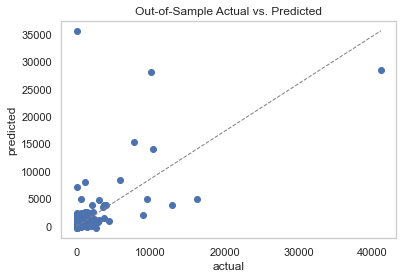

In [98]:
# scatter plot of predicted versus actual.
plt.scatter(y_test, test_preds)
plt.plot([0, max(y_test)], [0, max(test_preds)], color='gray', lw=1, linestyle='--')

plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('Out-of-Sample Actual vs. Predicted')
plt.grid()

plt.show()

**R2 score** determines how well the regression predictions approximate the real data points. So we have an R-squared of 0.74. Without even worrying about the units of y we can say this is a decent model. Because the model explains 75% of the variation in the data. 

#### References
1. https://pbpython.com/pandas-grouper-agg.html
2. https://medium.com/@polanitzer/clv-in-python-predict-the-customer-lifetime-value-e2e-from-research-to-production-f07182dadbe7
3. https://towardsdatascience.com/data-driven-growth-with-python-part-3-customer-lifetime-value-prediction-6017802f2e0f
4. https://www.propellercrm.com/blog/customer-lifetime-value-clv#:~:text=When%20you%20calculate%20your%20current%20CLV%2C%20you%20can,Other%20Side%20of%20the%20Coin%3A%20Customer%20Acquisition%20Cost?msclkid=9860b13db3c111ec81f916c2f427e8a8
5. https://usergrowth.io/blog/customer-lifetime-value/